In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [21]:
path = "D:\\OneDrive\\Desktop\\All\\magnetlab\\20230718\\tracks"

In [22]:
freqs_to_v = dict()
for dir in os.listdir(path):
    freqs_to_v[int(dir[:2])] = []

In [23]:
for dir in os.listdir(path):
    freq = int(dir[:2])
    for file in os.listdir(path + "\\" + dir):
        data = pd.read_csv(path + "\\" + dir + "\\" + file)
        xs = data["x_um"].to_numpy()
        ys = data["y_um"].to_numpy()
        ts = data["time"].to_numpy()
        initial_x = xs[0]
        initial_y = ys[0]
        final_x = xs[-1]
        final_y = ys[-1]
        duration = ts[-1] - ts[0]
        freqs_to_v[freq].append(np.sqrt((final_x - initial_x)**2 + (final_y - initial_y)**2) / duration)
        

In [24]:
freqs = np.array(list(freqs_to_v.keys()))
actual_freqs = freqs * 0.9
mean_vs = np.array([np.array(freqs_to_v[freq]).mean() for freq in freqs])
std_vs = np.array([np.array(freqs_to_v[freq]).std() for freq in freqs])
expected_vs = actual_freqs * 10
percent_errors = abs(mean_vs - expected_vs) / expected_vs * 100

In [25]:
percent_errors

array([8.32851296e+00, 6.07903170e+00, 2.88773996e+00, 1.52336129e+00,
       5.93929812e+00, 6.71074050e+00, 9.46153303e+00, 4.39028232e-02,
       8.79633634e-01, 1.22063553e+00, 2.02110745e+00, 9.42247984e+00,
       1.63677266e+01, 2.54334785e+01, 4.58437763e+01, 5.86496742e+01,
       7.05493643e+01, 6.79438024e+01, 7.09226448e+01, 7.10086160e+01,
       7.82736748e+01, 7.25000381e+01, 7.91496449e+01, 8.05691299e+01,
       8.58086524e+01, 8.61946350e+01, 8.67230691e+01, 8.59017080e+01,
       8.78725500e+01, 9.01639708e+01])

In [26]:
result = pd.DataFrame(columns=["freq", "actual_freq", "mean_v", "std_v", "expected_v", "percent_error"])
result["freq"] = freqs
result["actual_freq"] = actual_freqs
result["mean_v"] = mean_vs
result["std_v"] = std_vs
result["expected_v"] = expected_vs
result["percent_error"] = percent_errors


In [27]:
old_result = pd.read_csv("D:\\OneDrive\\Desktop\\All\\magnetlab\\20230718\\dia_range_2_12.csv")

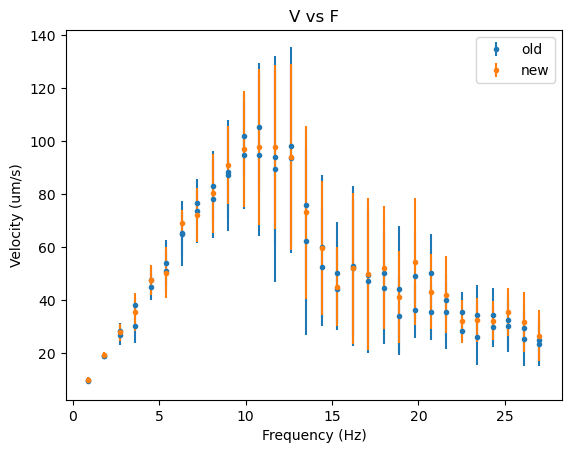

In [28]:
plt.errorbar(old_result["actual_frequency"], old_result["mean_velocity"], 
             yerr=old_result["standard_deviation"], fmt='.', label="old",)
plt.errorbar(actual_freqs, mean_vs, yerr=std_vs, fmt='.', label="new")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Velocity (um/s)")
plt.title("V vs F")
plt.legend()
plt.show()